In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
all_data = pd.read_csv("sbr_data_1M.csv")

C:\conda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
all_data.head()

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,1,1,1,0,0,0,1,1,1,4
1,1,2,1,0,0,0,1,1,1,4
2,1,3,1,0,0,0,0,1,1,4
3,1,80936,1,0,0,0,1,1,1,4
4,1,781,1,0,0,0,1,1,1,4


In [5]:
all_data.tail()

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
38300249,1000016,1354871,1,0,0,0,0,2,0,0
38300250,1000016,1355320,1,0,0,0,0,2,0,0
38300251,1000016,1359738,1,0,0,0,0,1,0,0
38300252,1000016,1365339,1,0,0,0,0,1,0,0
38300253,1000016,92206,1,0,0,0,0,1,0,0


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38300254 entries, 0 to 38300253
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   click           int64 
 3   follow          int64 
 4   like            int64 
 5   share           int64 
 6   video_category  object
 7   watching_times  int64 
 8   gender          int64 
 9   age             int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ GB


In [7]:
na_data = all_data.isna().sum()
na_data

user_id           0
item_id           0
click             0
follow            0
like              0
share             0
video_category    0
watching_times    0
gender            0
age               0
dtype: int64

In [11]:
all_data.describe(include='all')

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
count,3.830025e+07,3.830025e+07,38300254.0,3.830025e+07,3.830025e+07,3.830025e+07,38300254,3.830025e+07,3.830025e+07,3.830025e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,20136154,NaN,NaN,NaN
mean,4.554379e+05,5.186621e+05,1.0,3.483946e-03,3.982749e-02,4.025404e-03,NaN,1.490779e+00,1.024632e+00,2.041379e+00
std,2.810499e+05,7.545084e+05,0.0,5.892205e-02,1.955537e-01,6.331825e-02,NaN,2.067417e+00,6.404867e-01,1.245085e+00
min,1.000000e+00,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.126300e+05,7.845000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,2.000000e+00
50%,4.381850e+05,5.652300e+04,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,2.000000e+00
75%,6.847990e+05,1.353820e+06,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,1.000000e+00,3.000000e+00


In [98]:
# get the number of users in each age group
user_info = all_data.drop_duplicates(subset=["user_id"])
user_info.head()

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,1,1,1,0,0,0,1,1,1,4
71,2,5,1,0,0,0,1,1,1,4
86,3,17,1,0,1,0,0,2,2,2
123,4,44,1,0,0,0,1,1,2,2
150,5,68,1,0,0,0,1,5,1,2


<AxesSubplot:ylabel='age'>

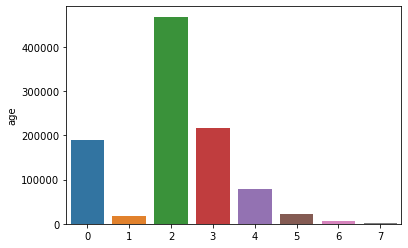

In [108]:
sns.barplot(data=user_info, y=user_info['age'].value_counts(), x=[2, 3, 0, 4, 5, 1, 6, 7])

In [132]:
user_info.iloc[:,2:]

,click,follow,like,share,video_category,watching_times,gender,age
0,1,0,0,0,1,1,1,4
71,1,0,0,0,1,1,1,4
86,1,0,1,0,0,2,2,2
123,1,0,0,0,1,1,2,2
150,1,0,0,0,1,5,1,2
...,...,...,...,...,...,...,...,...
38300123,1,0,0,0,1,1,0,0
38300180,1,0,0,0,1,1,1,2
38300216,1,0,0,1,1,2,2,2
38300226,1,0,0,0,1,1,1,1


In [ ]:
# apparently column 7 has some //N values

In [142]:
user_info.iloc[:,[3, 4, 5, 7, 8]].corr()

,follow,like,share,watching_times,gender
follow,1.000000,0.109139,0.042237,0.015651,-0.013211
like,0.109139,1.000000,0.083474,0.028282,-0.011570
share,0.042237,0.083474,1.000000,0.059094,0.000938
watching_times,0.015651,0.028282,0.059094,1.000000,0.002410
gender,-0.013211,-0.011570,0.000938,0.002410,1.000000


<AxesSubplot:>

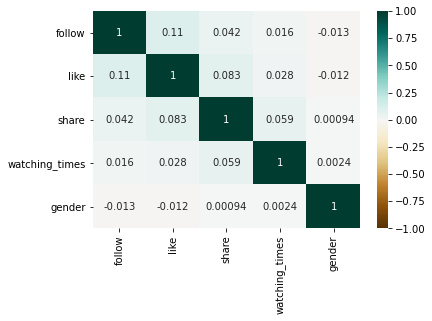

In [143]:
# do correlation plot of some columns
sns.heatmap(data=user_info.iloc[:,[3, 4, 5, 7, 8]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')